In [3]:
bench_chains = set()
tmscores = {}

with open("ARTEMISti.tsv") as inp:
    for line in inp:
        if not line.startswith("ID"):
            ls = line.strip().split()
            ch1,ch2 = ls[1], ls[2]
            tm1, tm2 = float(ls[3]), float(ls[4])
            bench_chains.add(ch1)
            bench_chains.add(ch2)
            if ch1 not in tmscores:
                tmscores[ch1] = {}
            if ch2 not in tmscores:
                tmscores[ch2] = {}
            tmscores[ch1][ch2] = tm1
            tmscores[ch2][ch1] = tm2

print(len(bench_chains))



637


In [4]:

rfam = {}

with open("Rfam.pdb") as inp:
    for line in inp:
        if not line.startswith("rfam_acc"):
            ls = line.strip().split()
            ch = ls[1]+ls[2]
            fam = ls[0]
            ev = float(ls[6])
            if ch not in bench_chains:
                continue
            if ch not in rfam or rfam[ch][1] > ev:
                rfam[ch] = (fam,ev)
for ch in rfam:
    rfam[ch] = rfam[ch][0]

fams = set(rfam.values())
print(len(rfam))
        


378


In [5]:
fam_pairs = {}

for ch1 in rfam.keys():
    for ch2 in tmscores[ch1]:
        if ch2 in rfam:
            fam1 = rfam[ch1]
            fam2 = rfam[ch2]
            tm1 = tmscores[ch1][ch2]
            tm2 = tmscores[ch2][ch1]
            if fam1 not in fam_pairs:
                fam_pairs[fam1] = {}
            if fam2 not in fam_pairs:
                fam_pairs[fam2] = {}
            if fam1 not in fam_pairs[fam2]:
                fam_pairs[fam2][fam1] = []
            if fam2 not in fam_pairs[fam1]:
                fam_pairs[fam1][fam2] = []
            fam_pairs[fam1][fam2].append(tm1)
            fam_pairs[fam2][fam1].append(tm2)

for fam1 in sorted(fam_pairs.keys()):
    for fam2 in sorted(fam_pairs[fam1].keys()):
        print(fam1, fam2, len(fam_pairs[fam1][fam2]))



RF00001 RF00001 924
RF00001 RF00002 396
RF00001 RF00003 44
RF00001 RF00004 396
RF00001 RF00005 3476
RF00001 RF00008 44
RF00001 RF00009 88
RF00001 RF00010 88
RF00001 RF00011 132
RF00001 RF00013 44
RF00001 RF00015 132
RF00001 RF00017 44
RF00001 RF00020 132
RF00001 RF00023 220
RF00001 RF00025 44
RF00001 RF00026 220
RF00001 RF00027 44
RF00001 RF00028 88
RF00001 RF00029 132
RF00001 RF00044 44
RF00001 RF00050 44
RF00001 RF00059 88
RF00001 RF00061 44
RF00001 RF00100 44
RF00001 RF00102 44
RF00001 RF00162 132
RF00001 RF00164 44
RF00001 RF00166 44
RF00001 RF00167 176
RF00001 RF00168 44
RF00001 RF00169 132
RF00001 RF00174 88
RF00001 RF00175 44
RF00001 RF00177 660
RF00001 RF00207 44
RF00001 RF00209 44
RF00001 RF00210 44
RF00001 RF00228 44
RF00001 RF00233 44
RF00001 RF00234 88
RF00001 RF00250 44
RF00001 RF00254 44
RF00001 RF00373 44
RF00001 RF00374 44
RF00001 RF00379 176
RF00001 RF00380 44
RF00001 RF00382 44
RF00001 RF00442 176
RF00001 RF00455 44
RF00001 RF00458 88
RF00001 RF00480 44
RF00001 RF0048

In [7]:
len(fam_pairs),len([1 for fam in fam_pairs if fam in fam_pairs[fam]])

(97, 37)

In [41]:
import numpy as np

data = []

for fam1 in sorted(fam_pairs.keys()):
    for fam2 in sorted(fam_pairs[fam1].keys()):
        data.append([fam1, fam2, len(fam_pairs[fam1][fam2]), round(np.max(fam_pairs[fam1][fam2]),3),
                     round(np.mean(fam_pairs[fam1][fam2]),3),round(np.median(fam_pairs[fam1][fam2]),3),])

data.sort(key = lambda x: x[-1], reverse=True)




In [36]:
edges = []
for x in data:
    if x[-1] > 0.45:
        edges.append((x[0],x[1],x[-1]))
    if x[0]==x[1] and x[-1] < 0.55:
        print(x)


['RF01734', 'RF01734', 4, 0.554, 0.547, 0.547]
['RF00010', 'RF00010', 4, 0.708, 0.536, 0.536]
['RF00020', 'RF00020', 12, 0.617, 0.501, 0.525]
['RF01750', 'RF01750', 12, 0.772, 0.566, 0.506]
['RF00011', 'RF00011', 12, 0.732, 0.487, 0.494]
['RF00028', 'RF00028', 4, 0.498, 0.49, 0.49]
['RF00029', 'RF00029', 12, 0.643, 0.396, 0.479]
['RF00169', 'RF00169', 12, 0.555, 0.485, 0.464]
['RF01960', 'RF01960', 1740, 1.0, 0.536, 0.45]
['RF00458', 'RF00458', 4, 0.39, 0.351, 0.351]
['RF00023', 'RF00023', 40, 0.432, 0.296, 0.344]
['RF00004', 'RF00004', 144, 0.696, 0.31, 0.302]
['RF00015', 'RF00015', 12, 0.519, 0.307, 0.231]
['RF00026', 'RF00026', 40, 0.689, 0.242, 0.2]


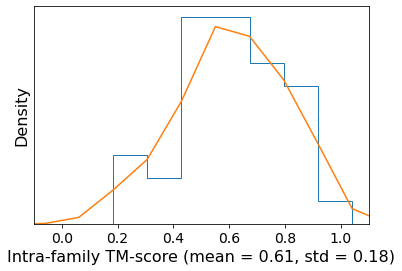

[0.2, 0.231, 0.302, 0.344, 0.351, 0.45, 0.464, 0.479, 0.49, 0.494, 0.506, 0.525, 0.536, 0.547, 0.569, 0.574, 0.582, 0.589, 0.598, 0.608, 0.652, 0.657, 0.665, 0.69, 0.691, 0.702, 0.716, 0.748, 0.75, 0.765, 0.829, 0.835, 0.843, 0.856, 0.872, 0.89, 0.925]


(0.598, 0.6087837837837838, 0.18233798956810135)

In [43]:
from scipy import stats
import matplotlib.pyplot as plt
symm = []
for x in data:
    if x[0]==x[1]:
        symm.append(x[-1])
#plt.hist(symm, density=True, histtype=u'step', bins=20)
#len(symm)
density = stats.gaussian_kde(symm)
n, x, _ = plt.hist(symm, bins=np.linspace(-3, 3, 50), 
                   histtype=u'step', density=True)  
plt.plot(x, density(x))
plt.xlim([-0.1,1.1])
plt.ylabel("Density", fontsize=16)
plt.xlabel("Intra-family TM-score" + " (mean = {}, std = {})".format(round(np.mean(symm),2),round(np.std(symm),2)), fontsize=16)
plt.yticks([])
plt.xticks(fontsize=14)
plt.savefig("intrafamily.svg")
plt.show()

print(sorted(symm))
np.median(symm), np.mean(symm), np.std(symm)

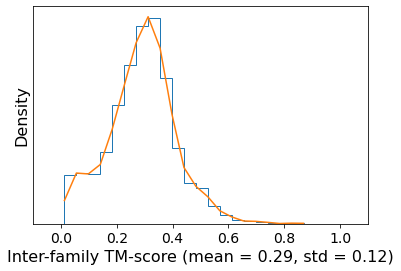

(0.295, 0.2895115979381443, 0.12245714796261309)

In [45]:
import matplotlib.pyplot as plt
nsymm = []
for x in data:
    if x[0]!=x[1]:
        nsymm.append(x[-1])
#plt.hist(symm, density=True, histtype=u'step', bins=20)
#len(symm)
density = stats.gaussian_kde(nsymm)
n, x, _ = plt.hist(nsymm, bins=20, 
                   histtype=u'step', density=True)  
plt.plot(x, density(x))
plt.xlim([-0.1,1.1])
plt.ylabel("Density", fontsize=16)
plt.xlabel("Inter-family TM-score" + " (mean = {}, std = {})".format(round(np.mean(nsymm),2),round(np.std(nsymm),2)), fontsize=16)
plt.yticks([])
plt.xticks(fontsize=14)
plt.savefig("interfamily.svg")
plt.show()
np.median(nsymm), np.mean(nsymm), np.std(nsymm)

In [12]:
for ch in rfam:
    if rfam[ch] == "RF00026":
        print(ch)

2lkrA
6j6gE
6ah0F
5tf6D
6id1F


In [51]:
for ch in rfam:
    if rfam[ch] == "RF00458":
        print(ch)

4d5nX
2il9A


In [48]:
for ch in rfam:
    if rfam[ch] == "RF00168":
        print(ch)
for ch in rfam:
    if rfam[ch] == "RF00380":
        print(ch)

3dilA
3pdrA


In [87]:
rfam['6chrA']


'RF00029'

In [84]:
print(fam_pairs["RF00029"]["RF02012"])
print(fam_pairs["RF02012"]["RF00029"])

[0.6382, 0.8353, 0.5045, 0.5045, 0.8353, 0.6382]
[0.5426, 0.6353, 0.0753, 0.0753, 0.6353, 0.5426]


In [52]:
print(fam_pairs["RF00026"]["RF00026"])
print(fam_pairs["RF00458"]["RF00458"])

[0.2096, 0.2201, 0.1892, 0.2029, 0.1449, 0.188, 0.1968, 0.2578, 0.2201, 0.2096, 0.6602, 0.6889, 0.1506, 0.2057, 0.1715, 0.251, 0.188, 0.1449, 0.2057, 0.1506, 0.2161, 0.1671, 0.1726, 0.1957, 0.2578, 0.1968, 0.251, 0.1715, 0.207, 0.1533, 0.1957, 0.1726, 0.2029, 0.1892, 0.6889, 0.6602, 0.1671, 0.2161, 0.1533, 0.207]
[0.3123, 0.3904, 0.3904, 0.3123]


In [37]:
import networkx as nx
G = nx.Graph()
G.add_weighted_edges_from(edges)

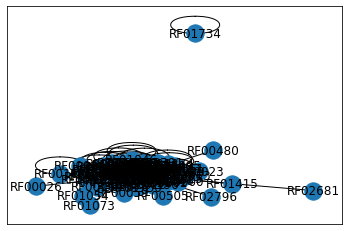

In [45]:
nx.draw_networkx(G)

In [50]:
np.mean(fam_pairs['RF00005']['RF02553']),np.mean(fam_pairs['RF02553']['RF00005'])

(0.6060493670886076, 0.5898126582278481)

In [70]:
from pyvis.network import Network

data = []

for fam1 in sorted(fam_pairs.keys()):
    for fam2 in sorted(fam_pairs[fam1].keys()):
        if fam1 < fam2:
            data.append([fam1, fam2, len(fam_pairs[fam1][fam2]), min(round(np.max(fam_pairs[fam1][fam2]),3),
                                                                    round(np.max(fam_pairs[fam2][fam1]),3)),
                         min(round(np.mean(fam_pairs[fam1][fam2]),3),round(np.mean(fam_pairs[fam2][fam1]),3)),
                         min(round(np.median(fam_pairs[fam1][fam2]),3),round(np.median(fam_pairs[fam2][fam1]),3))])

data.sort(key = lambda x: x[-1], reverse=True)

edges = []
for x in data:
    if x[-1] >= 0.4 and x[0]!=x[1]:
        edges.append((x[0],x[1],x[-1]))
G = nx.Graph()
G.add_weighted_edges_from(edges)

net = Network('2000px', '2000px', notebook=True, cdn_resources='in_line')
net.from_nx(G)
net.show_buttons(filter_=['physics']) 
net.show("example.html", )

example.html


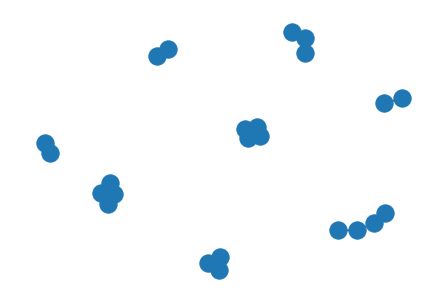

In [64]:
nx.draw(G)

In [38]:
from pyvis.network import Network

data = []

for fam1 in sorted(fam_pairs.keys()):
    for fam2 in sorted(fam_pairs[fam1].keys()):
        if fam1 < fam2:
            data.append([fam1, fam2, len(fam_pairs[fam1][fam2]), min(round(np.max(fam_pairs[fam1][fam2]),3),
                                                                    round(np.max(fam_pairs[fam2][fam1]),3)),
                         min(round(np.mean(fam_pairs[fam1][fam2]),3),round(np.mean(fam_pairs[fam2][fam1]),3)),
                         min(round(np.median(fam_pairs[fam1][fam2]),3),round(np.median(fam_pairs[fam2][fam1]),3))])

data.sort(key = lambda x: x[-1], reverse=True)

edges = []
for x in data:
    if x[-1] >= 0.45 and x[0]!=x[1]:
        edges.append((x[0],x[1],x[-1]))
G = nx.Graph()
G.add_weighted_edges_from(edges)

net = Network(notebook=True, cdn_resources='in_line')
net.from_nx(G)
net.show_buttons(filter_=['physics']) 
net.show("example045.html", )

example045.html


In [14]:
famclan = {}
with open("clan_membership.tsv") as inp:
    for line in inp:
        fam,clan = line.strip().split()
        famclan[fam] = clan
for fam in fams:
    if fam not in famclan:
        famclan[fam] = fam
len(famclan)

450

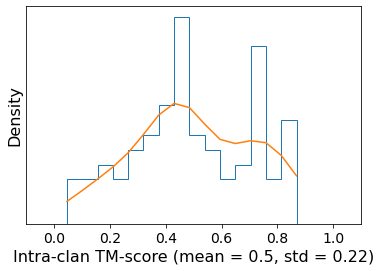

(0.48, 0.497860465116279, 0.21537987872111733)

In [46]:
import matplotlib.pyplot as plt
nsymm = []
for x in data:
    if x[0]!=x[1] and famclan[x[0]]==famclan[x[1]]:
        nsymm.append(x[-1])
#plt.hist(symm, density=True, histtype=u'step', bins=20)
#len(symm)
density = stats.gaussian_kde(nsymm)
n, x, _ = plt.hist(nsymm, bins=15, 
                   histtype=u'step', density=True)  
plt.plot(x, density(x))
plt.xlim([-0.1,1.1])
plt.ylabel("Density", fontsize=16)
plt.xlabel("Intra-clan TM-score" + " (mean = {}, std = {})".format(round(np.mean(nsymm),2),round(np.std(nsymm),2)), fontsize=16)
plt.yticks([])
plt.xticks(fontsize=14)
plt.savefig("intraclan.svg")
plt.show()
np.median(nsymm), np.mean(nsymm), np.std(nsymm)

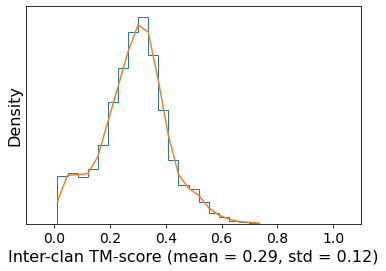

(0.294, 0.2875694775634078, 0.11956051103670699)

In [47]:
import matplotlib.pyplot as plt
nsymm = []
for x in data:
    if x[0]!=x[1] and famclan[x[0]]!=famclan[x[1]]:
        nsymm.append(x[-1])
#plt.hist(symm, density=True, histtype=u'step', bins=20)
#len(symm)
density = stats.gaussian_kde(nsymm)
n, x, _ = plt.hist(nsymm, bins=20, 
                   histtype=u'step', density=True)  
plt.plot(x, density(x))
plt.xlim([-0.1,1.1])
plt.ylabel("Density", fontsize=16)
plt.xlabel("Inter-clan TM-score" + " (mean = {}, std = {})".format(round(np.mean(nsymm),2),round(np.std(nsymm),2)), fontsize=16)
plt.yticks([])
plt.xticks(fontsize=14)
plt.savefig("interclan.svg")
plt.show()

np.median(nsymm), np.mean(nsymm), np.std(nsymm)